# Sentiment Analysis of Movie Reviews Using Machine Learning

# Introduction

Sentiment analysis, the process of determining the emotional tone or sentiment behind a piece of text, has become increasingly important in various domains, including product reviews, social media analysis, and market research. In this project, we aim to build a sentiment analysis model using machine learning techniques to classify movie reviews as either positive or negative.

The dataset we will be working with consists of a collection of movie reviews, divided into two categories: positive reviews and negative reviews. Our goal is to preprocess the text data, extract relevant features, train a machine learning model, and evaluate its performance in accurately classifying new, unseen reviews.

By leveraging the power of natural language processing and machine learning algorithms, we hope to develop a model that can effectively capture the underlying sentiment expressed in movie reviews. This could have practical applications in various scenarios, such as recommending movies to users based on their preferences, analyzing public opinion about a particular film, or even improving the recommendation systems of online movie platforms.

Throughout this project, we will explore the entire pipeline of a sentiment analysis task, from data acquisition and preprocessing to model training, evaluation, and interpretation of results. Along the way, we will also discuss the challenges and limitations of our approach and potential areas for improvement.

# Data Preparation

## Data Loading

We will load the data from our GitHub repository. This process might take a while, as we are reading all 2000 file names and movie reviews from the GitHub repository.

In [1]:
import requests
import json
import pandas as pd
from bs4 import BeautifulSoup

# URL of the directories
neg_url = "https://github.com/Juanfra21/data-science/tree/main/sentiment-analysis/neg"
pos_url = "https://github.com/Juanfra21/data-science/tree/main/sentiment-analysis/pos"

# Get response from github
neg_response = requests.get(neg_url)
pos_response = requests.get(pos_url)

# Retrieve HTML
neg_soup = BeautifulSoup(neg_response.text, "html.parser")
pos_soup = BeautifulSoup(pos_response.text, "html.parser")

# Find the turbo-frame containing the JSON data
neg_turbo_frame = neg_soup.find("turbo-frame", id="repo-content-turbo-frame")
pos_turbo_frame = pos_soup.find("turbo-frame", id="repo-content-turbo-frame")

# Extract the JSON data from the turbo-frame
neg_json_data = json.loads(neg_turbo_frame.div.script.string)
pos_json_data = json.loads(pos_turbo_frame.div.script.string)

# Store file names
neg_file_names = pd.json_normalize(neg_json_data["payload"]["tree"]["items"])["name"].values
pos_file_names = pd.json_normalize(pos_json_data["payload"]["tree"]["items"])["name"].values

# Create the lists where we will store the reviews
neg_reviews = []
pos_reviews = []

for neg_name,pos_name in zip(neg_file_names,pos_file_names):
    # Define the URL for the review
    neg_url = "https://raw.githubusercontent.com/Juanfra21/data-science/main/sentiment-analysis/neg/" + neg_name
    pos_url = "https://raw.githubusercontent.com/Juanfra21/data-science/main/sentiment-analysis/pos/" + pos_name
    
    # Store negative reviews
    neg_req = requests.get(neg_url)
    neg_req = neg_req.text
    neg_reviews.append(neg_req)
    
    # Store positive reviews
    pos_req = requests.get(pos_url)
    pos_req = pos_req.text
    pos_reviews.append(pos_req)

## Text Pre-Processing

We will now preprocess the reviews. To start, we import the necessary packages.

In [2]:
# Import and download necessary libraries for text pre-processing
import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leonh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leonh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Now, we will create a function for our text pre-processing pipeline, which will do the following:

1. Tokenize the movie reviews.
2. Remove all punctuation within the reviews.
3. Lowercase the reviews.
4. Remove stop words.
5. Remove all tokens with less than 2 characters.

In [3]:
# Define english stop words
stop_words = stopwords.words('english')

# Define function to remove punctuation
translator = str.maketrans('', '', string.punctuation)

def preprocess_text(text):    
    # Tokenize
    text = nltk.word_tokenize(text)
    
    # Remove punctuation
    text = [token.translate(translator) for token in text]
    
    # Lowercase
    text = [token.lower() for token in text]
    
    # Remove stop words
    text = [token for token in text if token not in stop_words]
    
    # Remove tokens with less than 2 characters
    text = [token for token in text if len(token) >= 3]
    
    return text

Now, we will create the lists where we will store the preprocessed reviews and then apply the function.

In [4]:
preprocessed_pos_reviews = []
preprocessed_neg_reviews = []

preprocessed_pos_reviews = [preprocess_text(review) for review in pos_reviews]
preprocessed_neg_reviews = [preprocess_text(review) for review in neg_reviews]

Let's see a before vs after example:

In [5]:
print(pos_reviews[22])

a fully loaded entertainment review - website coming in july ! 
>from ace ventura to truman burbank , jim carrey has run the whole gamut of comic , yet sympathetic , characters . 
1996's the cable guy was supposed to be his big " breakthrough " role from zany humor into darker , more dramatic acting . 
as most everyone knows , the results were , well , less-than-stellar . 
not only did the film not do so hot at the box office , but it was also panned by critics . 
as far as i know , gene siskel and i are the only ones willing to admit that we dug it . 
the first time i saw the cable guy , in theatres , i was in super critic-mode , and didn't really like it . 
however , due to the fact that hbo shows the movie every single day , i've had time to lean back , relax , and take in the film . 
and to my surprise , it grew on me . 
the plot is rather simple : broderick plays a guy named steven who befriends his cable guy , played by carrey , then is stalked by him when steven tries to break o

In [6]:
print(preprocessed_pos_reviews[22])

['fully', 'loaded', 'entertainment', 'review', 'website', 'coming', 'july', 'ace', 'ventura', 'truman', 'burbank', 'jim', 'carrey', 'run', 'whole', 'gamut', 'comic', 'yet', 'sympathetic', 'characters', '1996', 'cable', 'guy', 'supposed', 'big', 'breakthrough', 'role', 'zany', 'humor', 'darker', 'dramatic', 'acting', 'everyone', 'knows', 'results', 'well', 'lessthanstellar', 'film', 'hot', 'box', 'office', 'also', 'panned', 'critics', 'far', 'know', 'gene', 'siskel', 'ones', 'willing', 'admit', 'dug', 'first', 'time', 'saw', 'cable', 'guy', 'theatres', 'super', 'criticmode', 'really', 'like', 'however', 'due', 'fact', 'hbo', 'shows', 'movie', 'every', 'single', 'day', 'time', 'lean', 'back', 'relax', 'take', 'film', 'surprise', 'grew', 'plot', 'rather', 'simple', 'broderick', 'plays', 'guy', 'named', 'steven', 'befriends', 'cable', 'guy', 'played', 'carrey', 'stalked', 'steven', 'tries', 'break', 'relationship', 'see', 'steven', 'problems', 'girlfriend', 'robin', 'leslie', 'mann', 'thin

## Term-Document Matrix

Now, we will proceed to create the term-document matrix with the already preprocessed reviews.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine the positive and negative reviews into a single list of reviews
all_reviews = preprocessed_pos_reviews + preprocessed_neg_reviews

# Create labels for the reviews (1 for positive reviews, 0 for negative reviews)
labels = [1] * len(preprocessed_pos_reviews) + [0] * len(preprocessed_neg_reviews)

# Initialize the CountVectorizer from scikit-learn
vectorizer = CountVectorizer()

# Fit the vectorizer to the reviews and transform them into a term-document matrix
X = vectorizer.fit_transform([' '.join(review) for review in all_reviews])

Let's inspect some feature names (tokens) and the shape of the matrix

In [8]:
print(vectorizer.get_feature_names_out()[3456:3480]) 

['basket' 'basketball' 'basketballs' 'basking' 'basque' 'basquiat' 'bass'
 'bassan' 'basset' 'bassett' 'bassinger' 'basspounding' 'bastad' 'bastard'
 'bastardised' 'bastardizing' 'bastards' 'bastille' 'bastion' 'bat'
 'bataillon' 'batallion' 'batarang' 'batarangs']


In [9]:
X.shape

(2000, 44477)

Now, let's inspect the number of labels in the list, which should be 2000.

In [10]:
len(labels)

2000

# Frequency Distribution Plots 

## Most Frequent Positive Words 

In [11]:
from collections import Counter

positive_words = []

for review in preprocessed_pos_reviews:
    for word in review:
        positive_words.append(word)
        
# Count the frequency of elements
pos_counter = Counter(positive_words)

# Get the 30 most common elements and their frequencies
pos_most_common = pos_counter.most_common(30)

# Create a DataFrame from the most common elements
pos_data = {"Word": [x[0] for x in pos_most_common], "Frequency": [x[1] for x in pos_most_common]}
pos_words_df = pd.DataFrame(pos_data)

# Show the results
pos_words_df

,Word,Frequency
0,film,5193
1,one,2944
2,movie,2502
3,like,1719
4,story,1233
5,also,1200
6,good,1193
7,even,1175
8,time,1172
9,would,1080


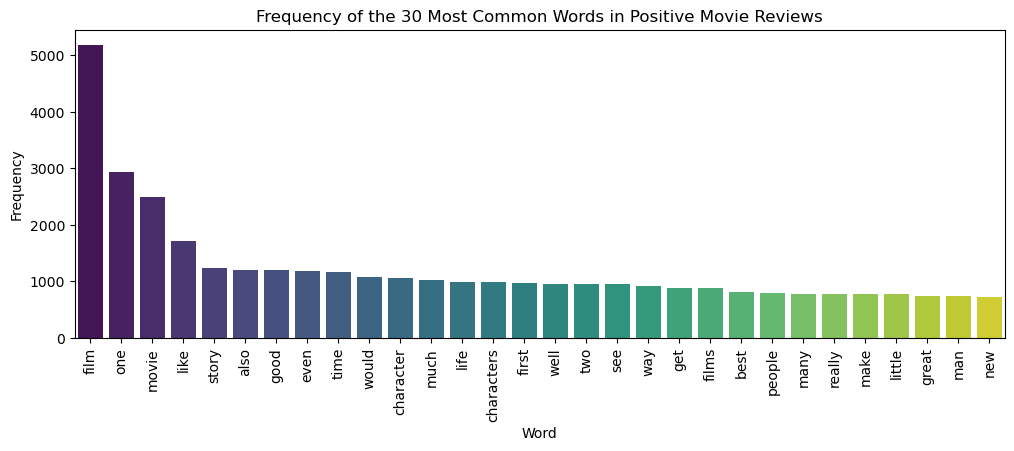

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 4))
sns.barplot(x="Word", y="Frequency", data=pos_words_df, palette="viridis")

# Add labels and title
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Frequency of the 30 Most Common Words in Positive Movie Reviews")

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90);

In the positive sentiment analysis dataset, common words suggest satisfaction and appreciation for the movies being reviewed. Words like "film," "one," "movie," "like," and "story" indicate a general positive tone towards films, with viewers likely expressing enjoyment or admiration. Terms like "good," "well," "great," and "best" suggest praise for various aspects of the films, such as storytelling, character development, or overall quality. Words like "time," "also," and "would" further indicate positive sentiments, suggesting that viewers find these films engaging, enjoyable, or otherwise valuable. Overall, the positive sentiment dataset reflects viewers' positive reactions and appreciation for the films they are reviewing.

## Most Frequent Negative Words 

In [13]:
negative_words = []

for review in preprocessed_neg_reviews:
    for word in review:
        negative_words.append(word)
        
# Count the frequency of elements
neg_counter = Counter(negative_words)

# Get the 30 most common elements and their frequencies
neg_most_common = neg_counter.most_common(30)

# Create a DataFrame from the most common elements
neg_data = {"Word": [x[0] for x in neg_most_common], "Frequency": [x[1] for x in neg_most_common]}
neg_words_df = pd.DataFrame(neg_data)

# Show the results
neg_words_df

,Word,Frequency
0,film,4258
1,movie,3174
2,one,2643
3,like,1836
4,even,1382
5,would,1185
6,good,1128
7,time,1112
8,get,1039
9,bad,1021


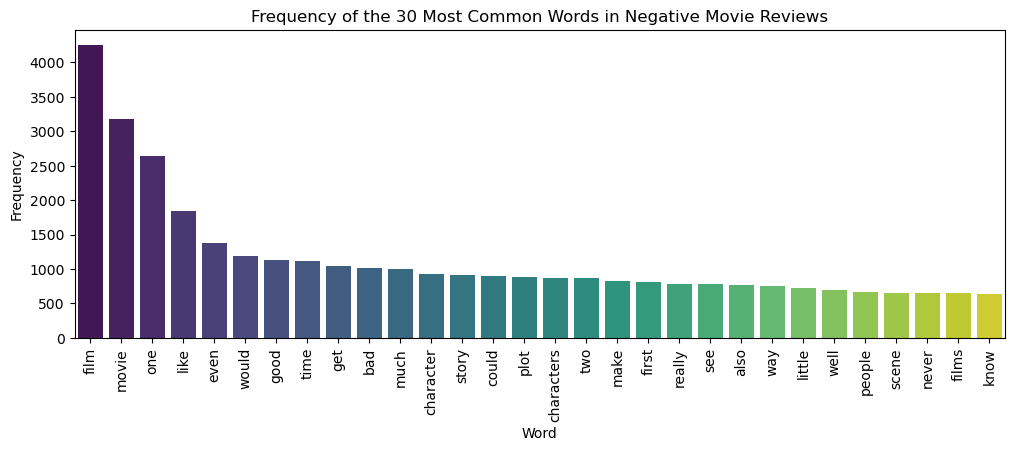

In [14]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 4))
sns.barplot(x="Word", y="Frequency", data=neg_words_df, palette="viridis")

# Add labels and title
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Frequency of the 30 Most Common Words in Negative Movie Reviews")

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90);

In the negative sentiment analysis dataset, the most common words reflect aspects of dissatisfaction and criticism in movie reviews. Words like "film," "movie," "like," "even," and "would" suggest a tendency to discuss various aspects of films, indicating a critical tone. Terms such as "bad," "much," "never," and "little" further emphasize negative sentiments, likely indicating dissatisfaction with elements like plot, characters, or overall execution. Criticisms about the storyline ("story," "plot"), characters ("character," "characters"), and the overall quality of the film ("good," "bad," "films") are prevalent, indicating that these are key areas where viewers express disappointment or dissatisfaction.

# Naïve Bayes Model Training

Multinomial Naive Bayes is preferred over GaussianNB and BernoulliNB for a term-document matrix because it directly models the likelihood of observing each term's frequency in a document, which aligns well with the count-based nature of the data. GaussianNB assumes a normal distribution for features, which is not suitable for count data, while BernoulliNB treats features as binary, which doesn't fully capture the information in term frequencies.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.25, random_state=42)

# Create a Multinomial Naive Bayes model
sentiment_analysis_mnb = MultinomialNB()

# Fit the model to the training data
sentiment_analysis_mnb.fit(X_train, y_train)

MultinomialNB()

# Naïve Bayes Model Testing

## Testing

After training our model, we now fit it to the testing set to make predictions.

In [16]:
# Make predictions on the test data
y_pred = sentiment_analysis_mnb.predict(X_test)

## Results

We will now calculate the metrics for our sentiment analysis model.

In [17]:
# Import the necessary packages
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Generic function for calculting metrics
def metrics(actual, predicted):
    # Scikit-learn functions
    # Accuracy
    accuracy_sklearn = accuracy_score(actual, predicted)
    # Precision
    precision_sklearn = precision_score(actual, predicted)
    # Sensitivity
    sensitivity_sklearn = recall_score(actual, predicted)  # Recall is equivalent to sensitivity
    # Specificity
    specificity_sklearn = recall_score(actual, predicted, pos_label=0)  # Specificity is calculated for the negative class
    # F1 Score
    f1_score_sklearn = f1_score(actual, predicted)
    # Print all the metrics
    print("Accuracy:", round(accuracy_sklearn*100,2), "%")
    print("Precision:", round(precision_sklearn*100,2), "%")
    print("Sensitivity (Recall):", round(sensitivity_sklearn*100,2), "%")
    print("Specificity:", round(specificity_sklearn*100,2), "%")
    print("F1 Score:", round(f1_score_sklearn*100,2), "%")
    
def print_confusion_matrix_info(conf_matrix):
    TN, FP, FN, TP = conf_matrix.ravel()
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Negatives (TN): {TN}")

In [18]:
metrics(y_test, y_pred)

Accuracy: 80.0 %
Precision: 81.27 %
Sensitivity (Recall): 79.38 %
Specificity: 80.66 %
F1 Score: 80.31 %


The Naive Bayes Multinomial classifier model achieved a reasonable performance, with an accuracy of 80%. However, it's essential to consider the trade-offs between different metrics, as accuracy alone may not provide a complete picture of the model's effectiveness.

The model's precision of 81.27% indicates that when it classifies a review as positive, it is correct approximately 81% of the time. This metric is particularly important when the cost of a false positive is high, as it ensures that positive classifications are reliable. On the other hand, the sensitivity (recall) of 79.38% suggests that the model correctly identifies around 79% of the actual positive reviews. A lower recall value could mean that the model is missing a significant number of positive reviews, leading to potential missed opportunities.

The specificity of 80.66% indicates that the model correctly identifies approximately 81% of the actual negative reviews. This metric is crucial when the cost of a false negative is high, as it ensures that negative classifications are reliable. The F1 score of 80.31% provides a balanced measure of the model's precision and recall, taking into account both false positives and false negatives.

While these metrics demonstrate a decent overall performance, there is still room for improvement. Additionally, analyzing the types of reviews the model struggles with and investigating potential biases or limitations in the training data could provide valuable insights for future iterations.

## Most Informative Features

In [19]:
import numpy as np

# Get the feature names from the vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# Get the log probabilities of the features for each class
feature_log_probs = sentiment_analysis_mnb.feature_log_prob_

# Calculate the difference in log probabilities between classes
# This will give us an idea of how informative each feature is for each class
diff_log_probs = feature_log_probs[1] - feature_log_probs[0]

# Sort the features by how informative they are
sorted_indices = np.argsort(diff_log_probs)[::-1]

# Display the top words most indicative of positive sentiment
print("Top words indicating positive sentiment:")
for idx in sorted_indices[:15]:
    # Calculate the probability ratio
    prob_ratio = np.exp(np.abs(diff_log_probs[idx]))
    print(f"{feature_names[idx]}: A review with this word is about {prob_ratio:.2f} times more likely to be positive")

# Display the top words most indicative of negative sentiment
print("\nTop words indicating negative sentiment:")
for idx in sorted_indices[-15:]:
    # Calculate the probability ratio
    prob_ratio = np.exp(np.abs(diff_log_probs[idx]))
    print(f"{feature_names[idx]}: A review with this word is about {prob_ratio:.2f} times more likely to be negative")

Top words indicating positive sentiment:
gattaca: A review with this word is about 40.29 times more likely to be positive
shrek: A review with this word is about 34.80 times more likely to be positive
leila: A review with this word is about 29.30 times more likely to be positive
mulan: A review with this word is about 28.85 times more likely to be positive
mallory: A review with this word is about 26.56 times more likely to be positive
lambeau: A review with this word is about 24.73 times more likely to be positive
guido: A review with this word is about 23.81 times more likely to be positive
sweetback: A review with this word is about 23.81 times more likely to be positive
feihong: A review with this word is about 22.89 times more likely to be positive
nello: A review with this word is about 22.89 times more likely to be positive
pollock: A review with this word is about 21.98 times more likely to be positive
beau: A review with this word is about 21.98 times more likely to be positiv

- **Specific movie titles:** Some of the top words indicating positive sentiment are movie titles like "Gattaca," "Shrek," "Mulan," and "Pollock." This suggests that reviews mentioning these movies are more likely to have a positive sentiment. Similarly, movies like "Godzilla" and "Pokemon" appearing in the negative sentiment list indicate that reviews mentioning these movies tend to be more negative.
- **Character names:** Several character names, such as "Leila," "Mallory," "Guido," "Ordell," and "Sethe," appear in the positive sentiment list. This could mean that reviews that discuss these characters in a favorable light tend to be positive.
- **Unusual words:** Some unexpected words like "Lambeau," "Sweetback," "Feihong," and "Nello" are present in the positive sentiment list. These words may be related to specific movies, characters, or concepts that are associated with positive reviews.
- **Generic words:** Words like "Babysitter," "Bats," "Bye," and "Wrestling" appear in the negative sentiment list, indicating that reviews containing these words tend to express negative sentiment, possibly due to the context in which they are used.
- **Unusual negative words:** Words like "Krippendorf," "Seagal," "Werewolf," "Sphere," and "Brenner" are present in the negative sentiment list. These may be related to specific movies, actors, or characters that are commonly associated with negative reviews.
- **HTML entities:** The presence of "nbsp" (non-breaking space) in the negative sentiment list suggests that reviews containing this HTML entity are more likely to be negative. This could be related to the formatting or structure of the reviews.


## Test Review

In [20]:
def test_review(review):
    # Preprocess the custom review
    preprocessed_custom_review = preprocess_text(review)  

    # Convert the preprocessed review into a term-document matrix
    X_custom = vectorizer.transform([' '.join(preprocessed_custom_review)])

    # Predict the sentiment of the custom review
    predicted_sentiment = sentiment_analysis_mnb.predict(X_custom)[0]

    if predicted_sentiment == 1:
        print("This review is predicted to be positive:")
    else:
        print("This review is predicted to be negative:")
        
    print("- The probability of this review to be positive is:", round((sentiment_analysis_mnb.predict_proba(X_custom)[0][1])*100,2),"%")
    print("- The probability of this review to be negative is:", round((sentiment_analysis_mnb.predict_proba(X_custom)[0][0])*100,2),"%")

In [21]:
testing_review = """ There were some things I didn't like about this film. Here's what I remember most
strongly: a man in an ingeniously fake-looking polar bear costume (funnier than the
"bear" from Hercules in New York); an extra with a less than believable laugh; an ex-drug
addict martian with tics; child actors who recite their lines very slowly and carefully;
a newspaper headline declaring that Santa has been "kidnapped", and a giant robot. The
least appealing acting job in the film must be when Mother Claus and her elves have been
"frozen" by the "Martians'" weapons. They seemed to display an exaggerated amount of
fear. Perhaps this was the preferred acting style in the 1960's??” """

test_review(testing_review)

This review is predicted to be positive:
- The probability of this review to be positive is: 97.7 %
- The probability of this review to be negative is: 2.3 %


This classification is not what one would expect, given the content of the review. The classification of this review as positive is inaccurate and seems to be a misclassification by the model.

There could be several reasons why the classifier may not be performing as expected in this case:

- **Training data:** The performance of a machine learning model heavily depends on the quality and representativeness of the training data. If the training data did not contain enough examples of reviews with similar language and context as the given review, the model may struggle to classify it correctly.
- **Feature extraction:** The NaiveBayes Multinomial classifier relies on the presence of specific words or phrases to determine the sentiment. If the feature extraction process failed to capture the relevant negative sentiment words or phrases from the review, the model may have incorrectly interpreted it as positive.
- **Context and sarcasm:** The review contains some sarcastic remarks, such as describing the "ingeniously fake-looking polar bear costume" as "funnier than the 'bear' from Hercules in New York." The model may not have been able to detect the sarcasm and interpret the true negative sentiment behind these statements.
- **Overfitting or underfitting:** If the model is either overfitted to the training data or underfitted (not complex enough to capture the nuances of the data), it may fail to generalize well to new, unseen examples like this review.

To improve the performance of the classifier, we could consider techniques like incorporating context and sarcasm detection, and exploring more advanced models like deep learning architectures that can better capture the nuances of text data.

# Conclusions

In this project, we successfully developed a sentiment analysis model for classifying movie reviews as positive or negative. We leveraged the Multinomial Naive Bayes algorithm, a popular choice for text classification tasks, and achieved reasonable performance metrics.

The model achieved an accuracy of 80%, indicating that it correctly classified 8 out of 10 reviews on average. Additionally, we evaluated other metrics such as precision, recall, specificity, and F1-score to gain a more comprehensive understanding of the model's performance.

One of the key strengths of our approach was the preprocessing pipeline, which included tokenization, punctuation removal, lowercasing, stop word removal, and filtering out short tokens. This step helped to transform the raw text data into a more structured and meaningful representation suitable for machine learning algorithms.

Furthermore, we explored the most informative features for positive and negative sentiment classification. By examining the words with the highest log probability ratios, we gained insights into the language patterns and specific terms that strongly indicated positive or negative sentiment in the movie reviews.

However, it is important to note that our model, like any machine learning system, has limitations and areas for improvement. For instance, the test review example demonstrated a case where the model misclassified a negative review as positive, highlighting the need for more robust handling of context, sarcasm, and nuanced language.

Future work could involve exploring more advanced natural language processing techniques, such as deep learning models like recurrent neural networks or transformers, which have shown promising results in sentiment analysis tasks. Additionally, incorporating external knowledge sources or domain-specific vocabularies could potentially enhance the model's understanding of the movie review context.

Overall, this project served as a practical introduction to the field of sentiment analysis and demonstrated the potential of machine learning techniques in understanding and classifying textual data based on sentiment. The insights gained from this project can be valuable for various applications, such as movie recommendation systems, brand monitoring, and customer feedback analysis.

# References

- https://scienceprog.com/simple-explanation-of-naive-bayes-classifier/
- https://blog.chapagain.com.np/python-nltk-sentiment-analysis-on-movie-reviews-natural-language-processing-nlp/
- https://spotintelligence.com/2022/12/21/nltk-preprocessing-pipeline/
- https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html